# Code to Process the Image and Segment it:

## Image Processing :

In [228]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import cv2
import os

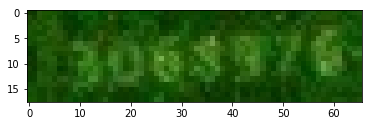

In [229]:
# Reading the image (as RGB):
img = cv2.imread('frame839_out.JPG')
blur = img
plt.imshow(img, 'gray')

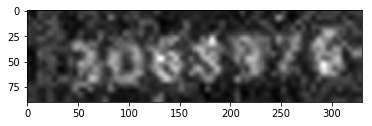

In [230]:
#Resizing the image and converting to grayscale:
res = cv2.resize(blur ,None,fx=5, fy=5, interpolation = cv2.INTER_CUBIC)

#Conversion to grayscale:
gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, 'gray')

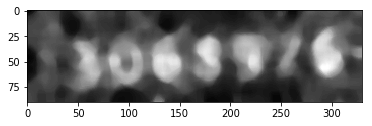

In [231]:
# Filtering out the noise using median filtering:
blur = cv2.medianBlur(gray, 15)
plt.imshow(blur, 'gray')

In [232]:
some = np.percentile(gray, 80)
print some

71.0


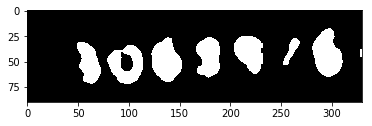

In [233]:
# Otsu binarization :
ret, th2 = cv2.threshold(blur,some,255,cv2.THRESH_BINARY)
plt.imshow(th2, 'gray')

In [234]:
# Connected component analysis : (CCA)
im = np.uint8(th2)
_, markers = cv2.connectedComponents(im)

## Segmentation Code : 

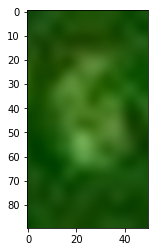

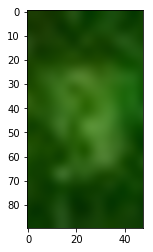

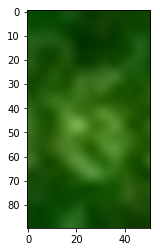

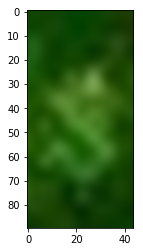

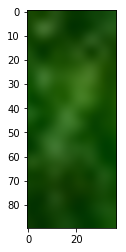

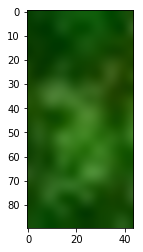

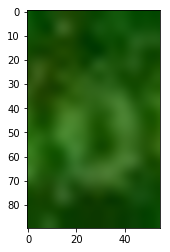

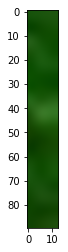

In [235]:
# Counter for new image file names:
count = 0
# Path to store the segmented images in :
path = '/home/ignitarium/Desktop/Text_seg/segmentedNum'

# Iterate through, segment out the image of each number:
for i in range(1, np.max(markers) + 1):
    x = (markers == i)
    y = np.sum(x, axis = 0)
    z = np.sum(x, axis = 1)
    max_x = 0
    min_x = 0
    # Finding the max width of a number(component) :
    for j in range(y.shape[0]):
        if y[j] != 0:
            max_x = j
    for j in range(y.shape[0]):
        if y[j] != 0:
            break
        min_x = j
    
    # Final setting of the dimensions of each number image:
    min_x = min_x - 10
    max_x = max_x + 10
    min_y = 0
    max_y = z.shape[0]
    #Writing the required image as a file :
    b = str(count)
    file_name = 'im'+b+'.jpg'
    cv2.imwrite(os.path.join(path, file_name),res[min_y:max_y, min_x:max_x])
    
    #Printing the image out for reference :
    plt.figure
    plt.imshow(res[min_y:max_y, min_x:max_x], cmap = 'gray', interpolation = 'bicubic')
    plt.show()
    
    #incrementing the image file counter:
    count = count + 1

In [236]:
# Making a neural network :
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                         keras.layers.Dense(450, activation = tf.nn.relu),
                         keras.layers.Dense(10, activation = tf.nn.softmax)])
# Compiling the neural network :
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')
model.load_weights('/home/ignitarium/Desktop/cp.ckpt')